#### Neural networks
##### Phases

     - Loading libraries
     - Loading datasets
     - Data visualization
     - Target construction
     - Model 1
     - Model 1 training
     - Evaluation - Model 1
     - Treatment of results
     - Model 2
     - Evaluation - Model 2
     - Saving the Model 1 for future use with pickle
     
[Download the Dataset](https://www.kaggle.com/c/digit-recognizer)

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
%matplotlib inline
import sys
import pickle
if not sys.warnoptions:
    import warnings
    warnings.simplefilter('ignore')

# Loading datasets

In [2]:
train = pd.read_csv('../data/digits/train.csv', sep=',')
test= pd.read_csv('../data/digits/test.csv', sep=',')

In [3]:
train.shape

(42000, 785)

# Data visualization

In [4]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


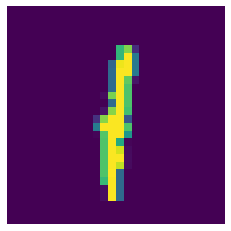

In [5]:
number = train.iloc[12][1:train.shape[1]]
number_matrix = number.values.reshape(28,28)
plt.imshow(number_matrix)
plt.axis('off');

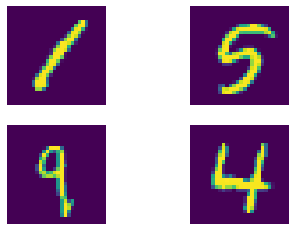

In [6]:
number = train.iloc[0][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(221)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[8][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(222)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[85][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(223)
plt.imshow(number_matrix)
plt.axis('off');
number = train.iloc[42][1:]
number_matrix =number.values.reshape(28,28)
plt.subplot(224)
plt.imshow(number_matrix)
plt.axis('off');

# Target construction

In [7]:
X = train.drop(['label'],axis=1) / 255

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,train['label'],random_state=42)

# Model training

In [9]:
mlp1 = MLPClassifier(hidden_layer_sizes =(50), max_iter = 150, solver='sgd', tol = 1e-4, random_state=42,
                    learning_rate_init=0.1, activation='relu',verbose=0)
mlp1.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=150,
              random_state=42, solver='sgd', verbose=0)

In [10]:
y_pred_test1 = mlp1.predict(X_test)

# Evaluation

In [11]:
print(confusion_matrix(y_test,y_pred_test1))
print('\n--------------------------------------------\n')
print(classification_report(y_test,y_pred_test1))

[[1009    0    3    1    0    7    3    0    1    1]
 [   0 1134    2    1    2    0    1    1    5    0]
 [   6   10 1024   11    6    0    3    3    7    2]
 [   1    1    2 1120    0    9    0    6    5    7]
 [   2    1    2    0  994    1    9    3    0   12]
 [   0    1    0   15    1  858   11    1    6    5]
 [   7    2    0    0    3    2  988    1    7    0]
 [   1    3    4    5    4    2    0 1105    1   10]
 [   0    6    6    6    3    5    2    2  969    6]
 [   4    1    2   10    8    4    0   14    4  987]]

--------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1025
           1       0.98      0.99      0.98      1146
           2       0.98      0.96      0.97      1072
           3       0.96      0.97      0.97      1151
           4       0.97      0.97      0.97      1024
           5       0.97      0.96      0.96       898
           6       0.97      0.98      0.97

In [12]:
print("Acc. train", mlp1.score(X_train, y_train))
print('Acc. test', mlp1.score(X_test,y_test))

Acc. train 1.0
Acc. test 0.9702857142857143


# Data processing

In [20]:
X2 = train.drop(['label'],axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X2,train['label'],random_state=42)

In [22]:
fator = 0.98/255
min_val = 0.01

In [23]:
x_train1 = X_train*fator + min_val
x_test1 = X_test*fator + min_val

# Second model!

In [28]:
mlp2 = MLPClassifier(hidden_layer_sizes =(50), max_iter = 150, solver='sgd', verbose = 0, tol = 1e-4, random_state=42,
                    learning_rate_init=0.1, activation='relu')
mlp2.fit(x_train1,y_train)

MLPClassifier(hidden_layer_sizes=50, learning_rate_init=0.1, max_iter=150,
              random_state=42, solver='sgd', verbose=0)

In [29]:
y_pred_test1 = mlp2.predict(x_test1)

# Evaluation

In [30]:
print(confusion_matrix(y_test,y_pred_test1))
print('\n--------------------------------------------\n')
print(classification_report(y_test,y_pred_test1))

[[1006    0    3    1    1    5    4    1    3    1]
 [   0 1135    2    1    1    0    1    2    4    0]
 [   5    8 1026    9    8    0    2    4    8    2]
 [   2    2    2 1108    0   11    1    9    8    8]
 [   4    1    2    0  988    1   10    4    0   14]
 [   1    1    0   13    1  860    8    1    7    6]
 [   2    2    1    1    3    5  989    1    6    0]
 [   0    3    5    2    5    2    0 1109    1    8]
 [   0    6    6    5    2    6    2    1  971    6]
 [   4    1    1   11    8    4    1   13    4  987]]

--------------------------------------------

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1025
           1       0.98      0.99      0.98      1146
           2       0.98      0.96      0.97      1072
           3       0.96      0.96      0.96      1151
           4       0.97      0.96      0.97      1024
           5       0.96      0.96      0.96       898
           6       0.97      0.98      0.98

In [31]:
print("Acc. train", mlp2.score(x_train1, y_train))
print('Acc. test', mlp2.score(x_test1,y_test))

Acc. train 1.0
Acc. test 0.9694285714285714


# So the first model was better! Let's dump it with pickle!

In [32]:
#saving the model
filename = 'digit_NT.sav'
pickle.dump(mlp1,open(filename,'wb'))